## Assignment2 - Supervised Learning flow

In [1]:
# student 1: Elior 8412
# student 2: Yafit 3795
# student 3: Neta 1086
# student 4: Daria 5316
# (optional) student 5:
# (optional) student 6:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import f1_score

X_train  = pd.read_csv("wine_train.csv")
y_train = X_train['target']
X_train  = X_train.drop('target', axis=1)

X_test  = pd.read_csv("wine_test.csv")
y_test = X_test['target']
X_test  = X_test.drop('target', axis=1)

In [3]:
X_train.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,12.08,1.83,2.32,18.5,81.0,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480.0
1,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0
2,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0
3,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0
4,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0


In [4]:
y_train.head(10)

0    1
1    2
2    1
3    1
4    2
5    1
6    0
7    2
8    0
9    1
Name: target, dtype: int64

In [5]:
X_test.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,13.78,2.76,2.30,22.0,90.0,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615.0
1,14.02,1.68,2.21,16.0,96.0,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035.0
2,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725.0
3,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407.0
4,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0


In [6]:
print("The alcohol per instance is:")
print(X_train['alcohol'].head(10))
print("The mean of the alcohol percentage is:")
print(X_train['alcohol'].mean())

The alcohol per instance is:
0    12.08
1    13.58
2    12.37
3    11.82
4    13.16
5    13.11
6    13.83
7    12.87
8    14.06
9    12.22
Name: alcohol, dtype: float64
The mean of the alcohol percentage is:
12.997253521126757


In [7]:
X_train.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,12.997254,2.297746,2.361690,19.419718,99.943662,2.315986,2.063592,0.346690,1.561901,5.030211,0.958563,2.638873,742.457746
std,0.789931,1.093317,0.283231,3.354815,13.683751,0.639469,1.005302,0.117562,0.540979,2.239593,0.219631,0.718083,317.250905
min,11.410000,0.740000,1.360000,10.600000,78.000000,0.980000,0.340000,0.130000,0.420000,1.280000,0.480000,1.290000,278.000000
25%,12.370000,1.592500,2.222500,17.250000,88.000000,1.782500,1.257500,0.260000,1.250000,3.180000,0.800000,1.922500,500.000000
50%,13.050000,1.865000,2.360000,19.250000,98.000000,2.380000,2.155000,0.320000,1.505000,4.800000,0.960000,2.815000,660.000000
75%,13.637500,3.020000,2.557500,21.375000,108.000000,2.822500,2.887500,0.430000,1.870000,6.182500,1.120000,3.197500,957.500000
max,14.750000,5.650000,3.230000,30.000000,151.000000,3.880000,5.080000,0.630000,3.580000,11.750000,1.450000,4.000000,1680.000000


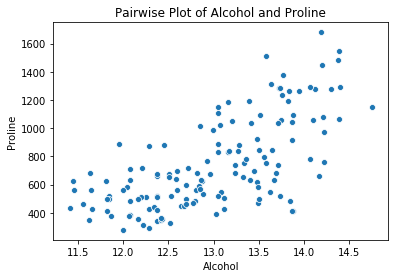

As we can see, there is a direct correlation between alcohol percentages and proline levels.


In [8]:
selected_columns = X_train[['alcohol', 'proline']]
sns.scatterplot(x='alcohol', y='proline', data=selected_columns)
plt.title('Pairwise Plot of Alcohol and Proline')
plt.xlabel('Alcohol')
plt.ylabel('Proline')
plt.show()
print("As we can see, there is a direct correlation between alcohol percentages and proline levels.")

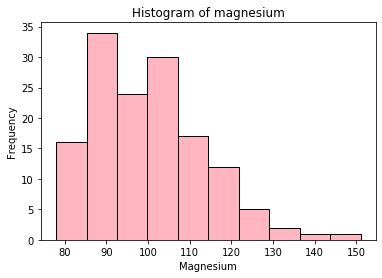

As we can see, most of the magnesium amount is between 85 to 115.


In [9]:
alcohol_data = X_train['magnesium']
plt.hist(alcohol_data)
plt.hist(alcohol_data, color='lightpink', edgecolor='black')
plt.xlabel('Magnesium')
plt.ylabel("Frequency")
plt.title(f"Histogram of magnesium")
plt.show()
print("As we can see, most of the magnesium amount is between 85 to 115.")

In [10]:
#Standartization

scaler_standart = StandardScaler()
X_train_scaled_standart = scaler_standart.fit_transform(X_train)

In [11]:
#MinMax

scaler_minmax = MinMaxScaler(feature_range=(-1, 1))
X_train_scaled_minmax = scaler_minmax.fit_transform(X_train)

In [12]:
# Here we define the Hyperparameters for the KNeighbors method:
param_grid_knn = {
    'n_neighbors': [5, 10],
    'metric': ['manhattan', 'chebyshev']
}
# Here we define the Hyperparameters for the DecisionTree method:
param_grid_dt = {
    'max_depth': [4, 6]
}

# Here we define a function to perform grid search with scaling:
def perform_grid_search(X_train, y_train, scaling_method, scaling_name):
    scaler = scaling_method()
    X_train_scaled = scaler.fit_transform(X_train)
    
    grid_searches = []
    
    # Instantiate the GridSearchCV object for each KNN and Decision Tree model
    for params, estimator in [(param_grid_knn, KNeighborsClassifier()), (param_grid_dt, DecisionTreeClassifier())]:
        grid_search = GridSearchCV(estimator=estimator, param_grid=params, cv=5, scoring='f1_macro', iid=False)
        grid_searches.append(grid_search)
    
    # Fit the grid search objects
    for grid_search in grid_searches:
        grid_search.fit(X_train_scaled, y_train)
    
    # Collect all results
    all_results = []
    for grid_search in grid_searches:
        results = pd.DataFrame(grid_search.cv_results_)
        results = results[['mean_test_score', 'params']]
        results['scaling'] = scaling_name
        results['estimator'] = grid_search.estimator.__class__.__name__

        all_results.append(results)
    
    # Concatenate all results
    all_results_df = pd.concat(all_results, ignore_index=True)
    all_results_df.sort_values('mean_test_score', ascending=False, inplace=True)
    all_results_df.reset_index(drop=True, inplace=True)
    
    return all_results_df

# Here we perform grid search with Min-Max scaling
minmax_results_df = perform_grid_search(X_train, y_train, MinMaxScaler, 'MinMax')

# Here we perform grid search with Standardization
standard_results_df = perform_grid_search(X_train, y_train, StandardScaler, 'Standard')

# Here we combine results from both scaling methods
combined_results_df = pd.concat([minmax_results_df, standard_results_df], ignore_index=True)
combined_results_df.sort_values('mean_test_score', ascending=False, inplace=True)
combined_results_df.reset_index(drop=True, inplace=True)

# Here we style the combined DataFrame
styled_df = combined_results_df.style.set_table_styles([
    {'selector': 'th', 'props': [('font-size', '12pt'), ('text-align', 'center')]},
    {'selector': 'td', 'props': [('text-align', 'center')]}
]).set_properties(**{
    'border': '1px solid black',
    'font-size': '11pt'
}).hide_index()

styled_df


mean_test_score,params,scaling,estimator
0.973545,"{'metric': 'manhattan', 'n_neighbors': 10}",MinMax,KNeighborsClassifier
0.966862,"{'metric': 'manhattan', 'n_neighbors': 10}",Standard,KNeighborsClassifier
0.959599,"{'metric': 'manhattan', 'n_neighbors': 5}",MinMax,KNeighborsClassifier
0.952811,"{'metric': 'chebyshev', 'n_neighbors': 10}",Standard,KNeighborsClassifier
0.951662,"{'metric': 'manhattan', 'n_neighbors': 5}",Standard,KNeighborsClassifier
0.945626,"{'metric': 'chebyshev', 'n_neighbors': 10}",MinMax,KNeighborsClassifier
0.938054,"{'metric': 'chebyshev', 'n_neighbors': 5}",MinMax,KNeighborsClassifier
0.931024,"{'metric': 'chebyshev', 'n_neighbors': 5}",Standard,KNeighborsClassifier
0.879579,{'max_depth': 4},Standard,DecisionTreeClassifier
0.871001,{'max_depth': 4},MinMax,DecisionTreeClassifier


In [13]:
X_test_scaled_minmax = scaler_minmax.transform(X_test)

In [14]:
knn = KNeighborsClassifier(n_neighbors=10, metric='manhattan')

# Here we fit the classifier to the scaled training data
knn.fit(X_train_scaled_minmax, y_train)

# Here we predict the labels for the scaled test data
y_pred = knn.predict(X_test_scaled_minmax)

print("We predicted:")
print(y_pred)
print("Acctual category:")
print(y_test.to_numpy())

We predicted:
[2 0 2 1 2 1 0 1 1 1 1 0 0 2 1 2 1 0 1 1 0 2 1 0 0 0 2 1 2 2 2 1 0 1 2 0]
Acctual category:
[2 0 2 1 2 1 0 1 1 1 1 0 0 2 1 2 1 0 1 1 0 2 1 0 0 0 2 1 2 2 2 1 0 1 2 0]


In [15]:
y_test_array = y_test.to_numpy() if hasattr(y_test, 'to_numpy') else y_test

# Calculate the macro average F1 score
macro_avg_f1 = f1_score(y_test_array, y_pred, average='macro')

# Output the macro average F1 score
print(f"Macro Average F1 Score: {macro_avg_f1:.3f}")

print("We perfected it! :-)")

Macro Average F1 Score: 1.000
We perfected it! :-)
